In [22]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [9]:
def calc_total_usd(state: PortfolioState) -> PortfolioState:
    """
    Calculate the total amount in USD and INR.
    """
    state['total_usd'] = state['amount_usd'] * 1.8  # Assuming 1 USD = 1 USD
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    """
    Convert the total amount in USD to INR.
    """
    state['total_inr'] = state['total_usd'] * 85  # Assuming 1 USD = 85 INR
    return state

In [10]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_usd_node", calc_total_usd)
builder.add_node("convert_to_inr_node", convert_to_inr)

builder.add_edge(START, "calc_total_usd_node")
builder.add_edge("calc_total_usd_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

graph = builder.compile()


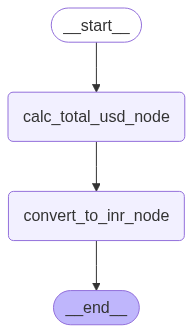

In [18]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
graph.invoke({"amount_usd": 1000})

{'amount_usd': 1000, 'total_usd': 1800.0, 'total_inr': 153000.0}